In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
nasa_data = pd.read_csv('projectData/nasa_data.csv')
nasa_data.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS
0,3703080,127.219878,284.472297,6.115834,62753692.0,0.808259,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,146.067964,326.617897,18.113985,57298148.0,0.718200,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,231.502122,517.654482,7.590711,7622911.5,0.950791,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,8.801465,19.680675,11.173875,42683616.0,0.983902,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,127.219878,284.472297,9.840831,61010824.0,0.967687,1.483543,2457814.455,135.142133,0.726395,True


 ### Check the Basic Statistics

In [3]:
print("Data type : ", type(nasa_data))
print("Data dims : ", nasa_data.shape)
print(nasa_data.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4687, 11)
NEO_REFERENCE_ID                  int64
EST_DIA_IN_M(MIN)               float64
EST_DIA_IN_M(MAX)               float64
RELATIVE_VELOCITY_KM_PER_SEC    float64
MISS_DIST.(KILOMETERS)          float64
PERIHELION_DISTANCE             float64
APHELION_DIST                   float64
PERIHELION_TIME                 float64
MEAN_ANOMALY                    float64
MEAN_MOTION                     float64
HAZARDOUS                          bool
dtype: object


### Information about the Variables

In [4]:
nasa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NEO_REFERENCE_ID              4687 non-null   int64  
 1   EST_DIA_IN_M(MIN)             4687 non-null   float64
 2   EST_DIA_IN_M(MAX)             4687 non-null   float64
 3   RELATIVE_VELOCITY_KM_PER_SEC  4687 non-null   float64
 4   MISS_DIST.(KILOMETERS)        4687 non-null   float64
 5   PERIHELION_DISTANCE           4687 non-null   float64
 6   APHELION_DIST                 4687 non-null   float64
 7   PERIHELION_TIME               4687 non-null   float64
 8   MEAN_ANOMALY                  4687 non-null   float64
 9   MEAN_MOTION                   4687 non-null   float64
 10  HAZARDOUS                     4687 non-null   bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 370.9 KB


Through this dataset, we want to find out the `Impact Risk` for each near-Earth Object (NEO) based on its `Estimated Diameter` and `Relative Velocity`. We will be analysing the different variables present in this dataset other than `Estimated Diameter(Max)` and `Relative Velocity` to see if they have any effect on impact risk.

We define the `Risk of Impact` as `Estimated Diameter` * `Relative Velocity`. We will then define thresholds for categorizing `Risk of Impact` into low, medium, and high categories based on the calculated risk values to ensure a balanced distribution between the 3.

In [5]:
#numeric predictors 
nasa_data.describe()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION
count,4.687000e+03,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,204.604203,457.508906,13.970811,3.841347e+07,0.813383,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,369.573402,826.391249,7.293223,2.181110e+07,0.242059,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,1.010543,2.259644,0.335504,2.660989e+04,0.080744,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,33.462237,74.823838,8.432865,1.995928e+07,0.630834,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,110.803882,247.765013,12.917889,3.964771e+07,0.833153,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,253.837029,567.596853,18.077649,5.746863e+07,0.997227,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,15579.552410,34836.938250,44.633747,7.478160e+07,1.299832,8.983852,2.458839e+06,359.917991,2.039000


In [6]:
#boolean predictor
nasa_data[['HAZARDOUS']].describe()

,HAZARDOUS
count,4687
unique,2
top,False
freq,3932


In [7]:
#calculate impact risk as the product of estimated diameter and relative velocity
nasa_data['IMPACT RISK'] = (nasa_data['EST_DIA_IN_M(MAX)'] - nasa_data['EST_DIA_IN_M(MIN)']) * nasa_data['RELATIVE_VELOCITY_KM_PER_SEC']

#create a new DataFrame with the required columns (removed neo ref ID since it is not a variable but just an identifier)
nasa_data_EDA = nasa_data[['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION', 'HAZARDOUS', 'IMPACT RISK']]

print(nasa_data_EDA)

      EST_DIA_IN_M(MIN)  EST_DIA_IN_M(MAX)  RELATIVE_VELOCITY_KM_PER_SEC  \
0            127.219878         284.472297                      6.115834   
1            146.067964         326.617897                     18.113985   
2            231.502122         517.654482                      7.590711   
3              8.801465          19.680675                     11.173875   
4            127.219878         284.472297                      9.840831   
...                 ...                ...                           ...   
4682          44.111820          98.637028                     22.154265   
4683           6.089126          13.615700                      3.225150   
4684          76.657557         171.411509                      7.191642   
4685         116.025908         259.441818                     11.352090   
4686         400.640618         895.859655                     35.946852   

      MISS_DIST.(KILOMETERS)  PERIHELION_DISTANCE  APHELION_DIST  \
0               6.2

### Comparing the different variables with Impact Risk


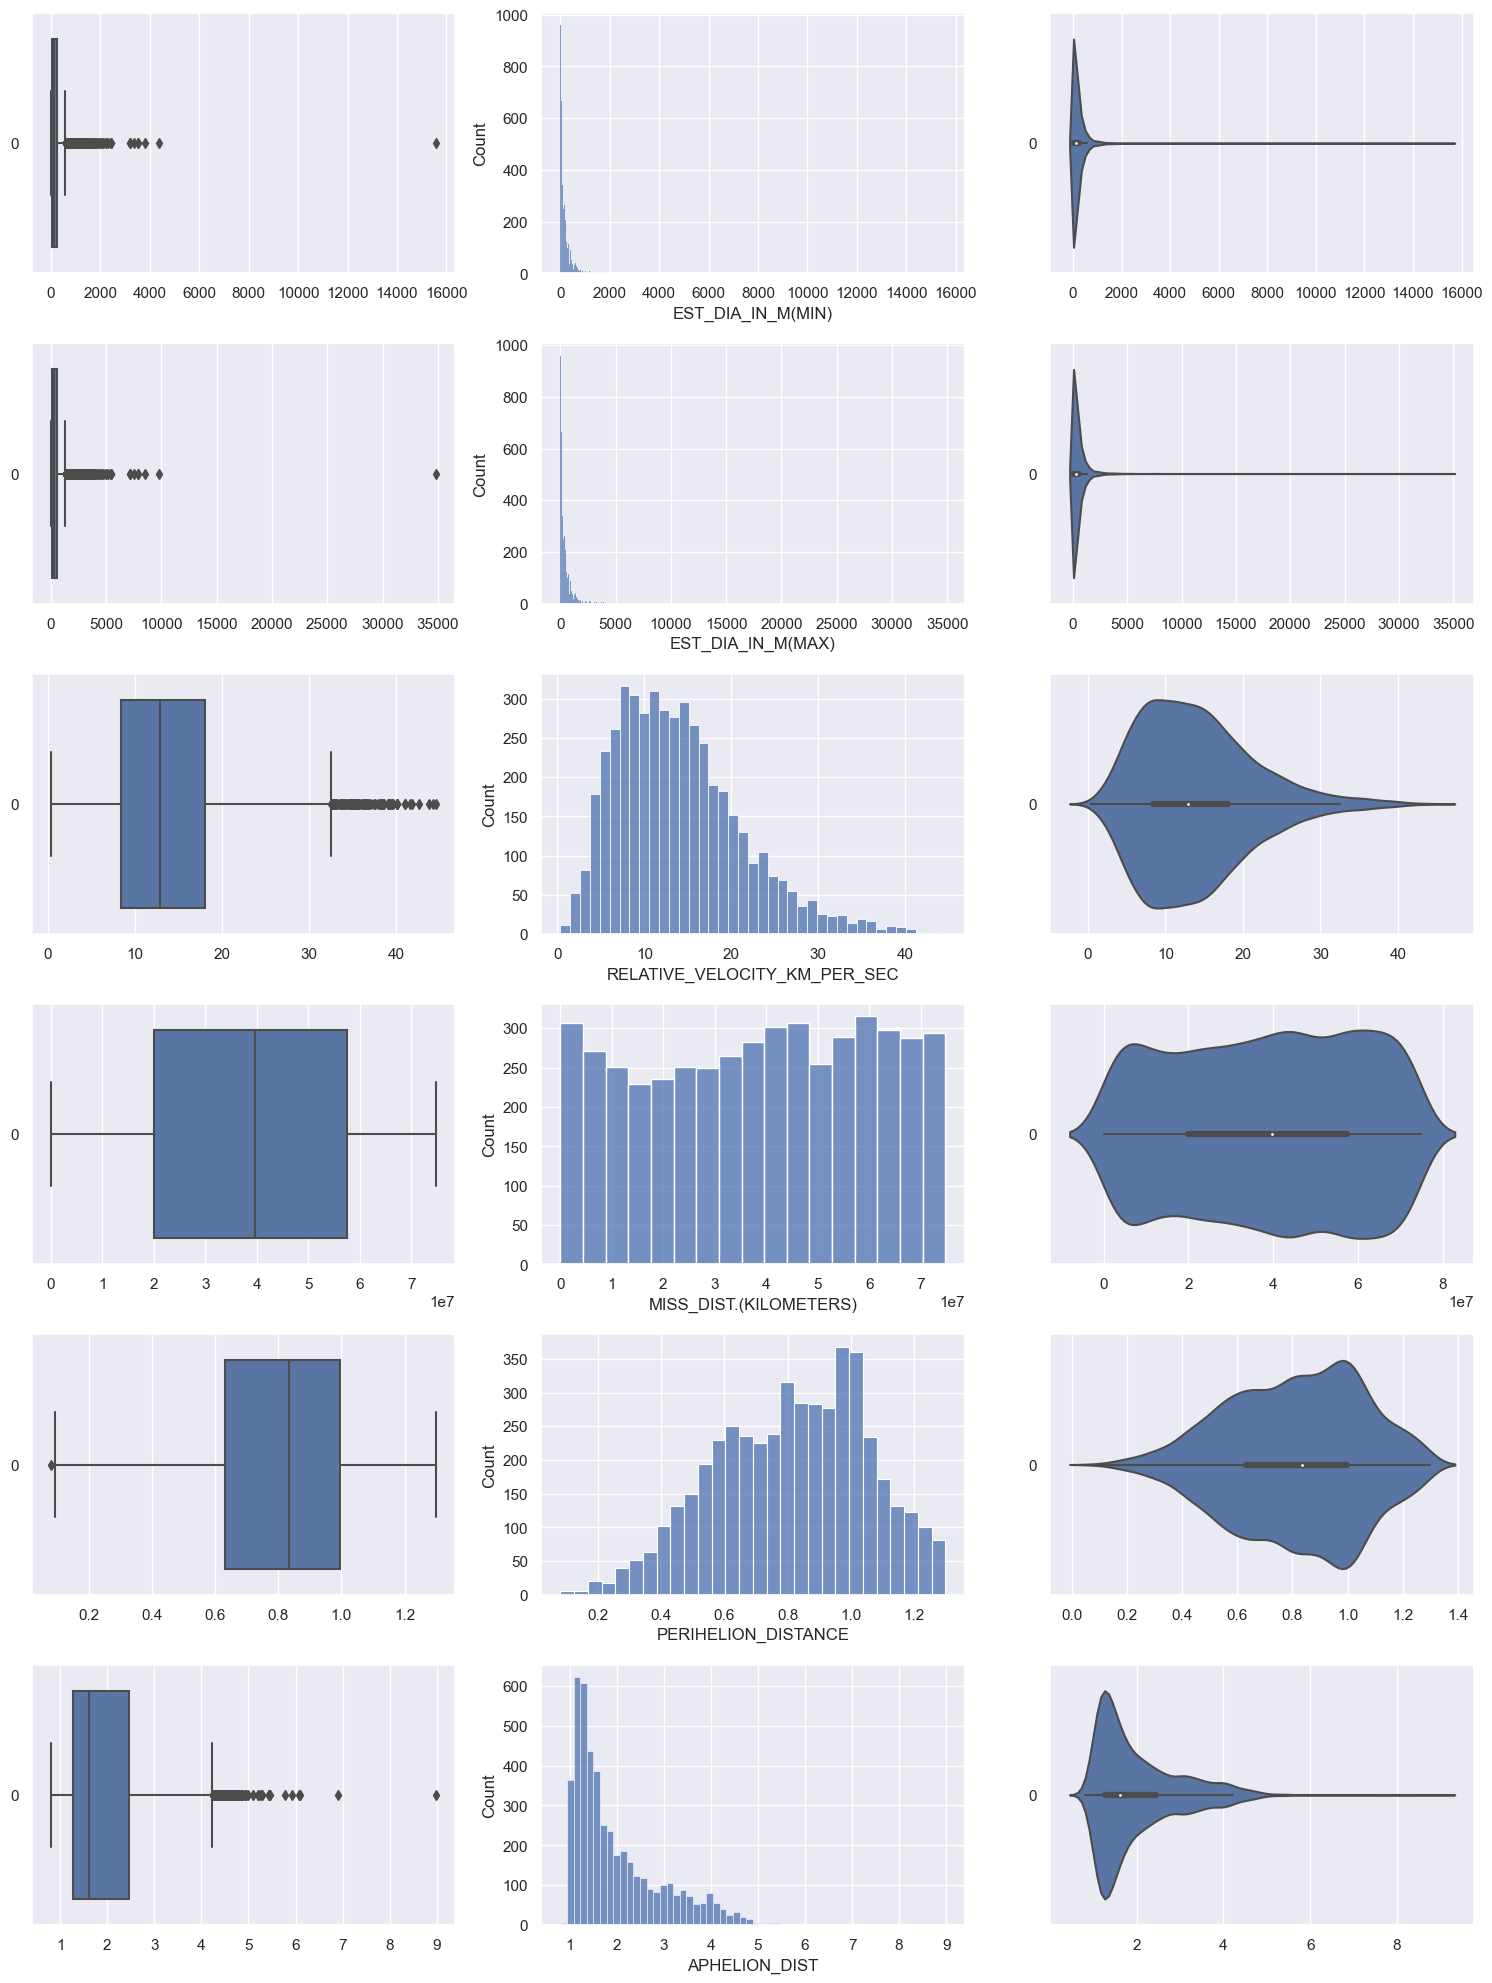

In [8]:
#subplots 
fig, axes = plt.subplots(6, 3, figsize=(15, 20))

for count, var in enumerate(nasa_data_EDA):
    #check if count exceeds the number of rows in axes
    if count < axes.shape[0]:
        sb.boxplot(data=nasa_data_EDA[var], orient="h", ax=axes[count, 0])
        sb.histplot(data=nasa_data_EDA[var], ax=axes[count, 1])
        sb.violinplot(data=nasa_data_EDA[var], orient="h", ax=axes[count, 2])
    else:
        break

plt.tight_layout()
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


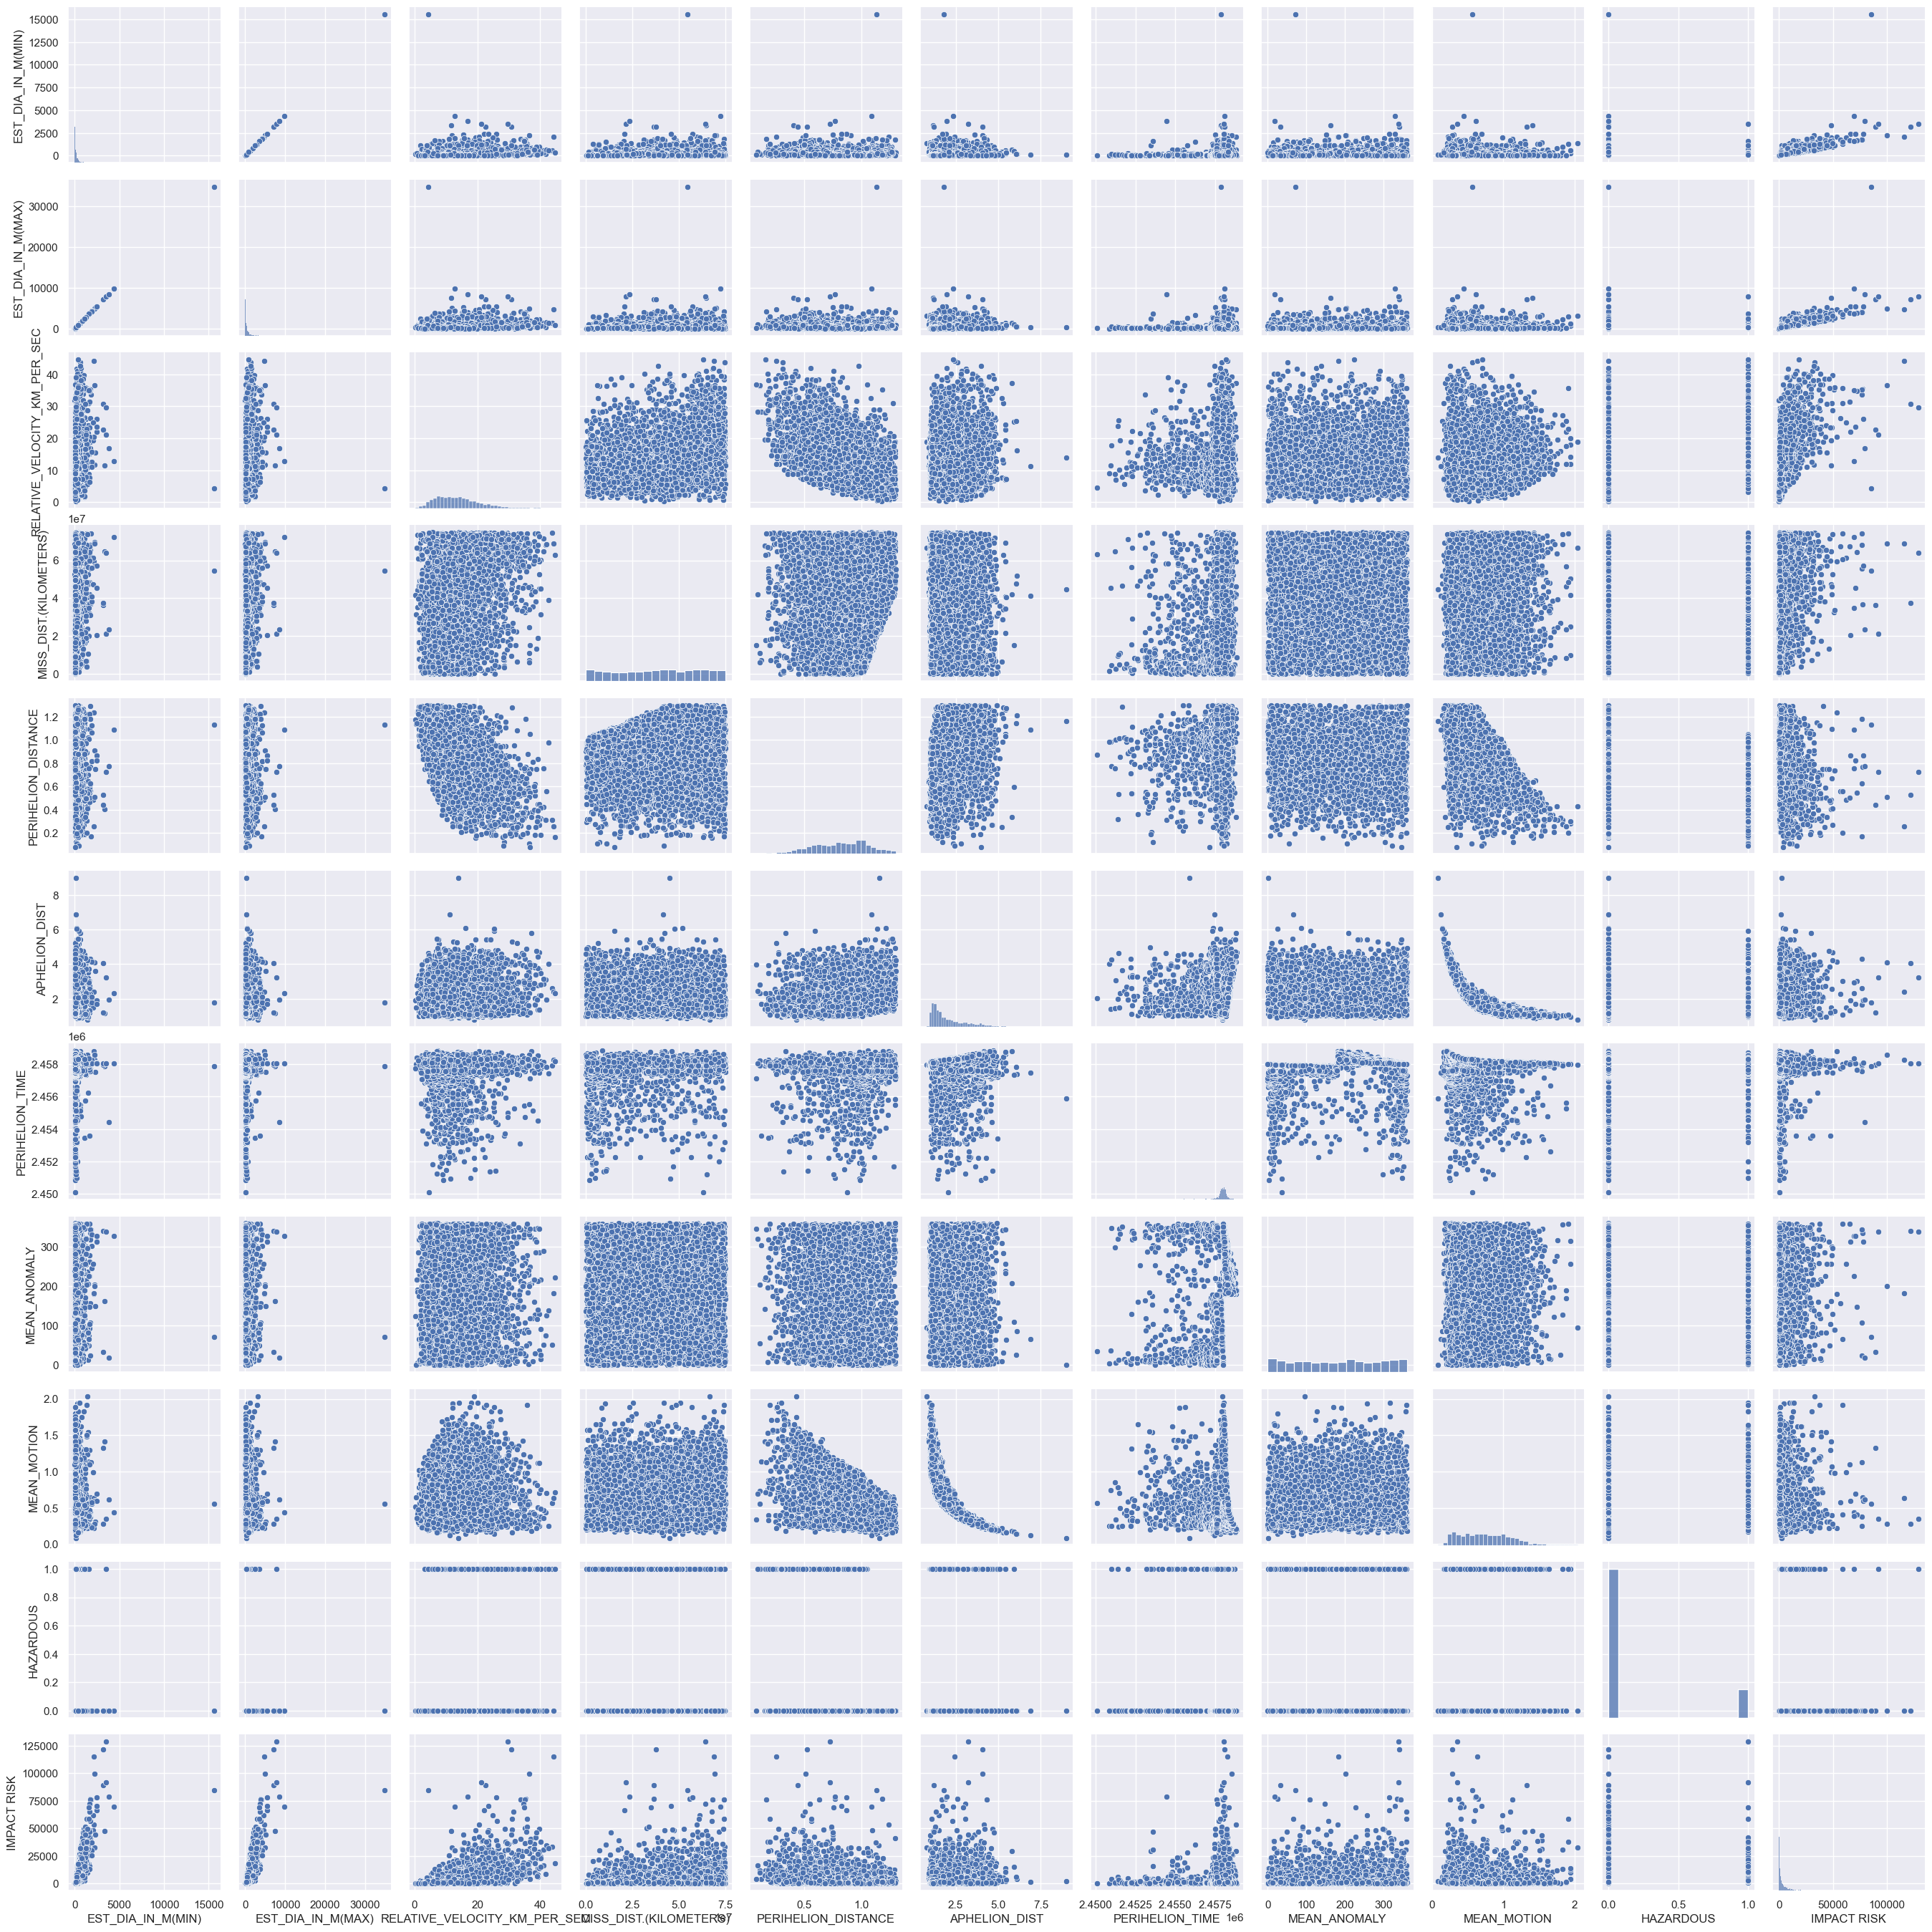

In [9]:
#pairplot
#draw pairs of variables against one another
sb.pairplot(data = nasa_data_EDA) 

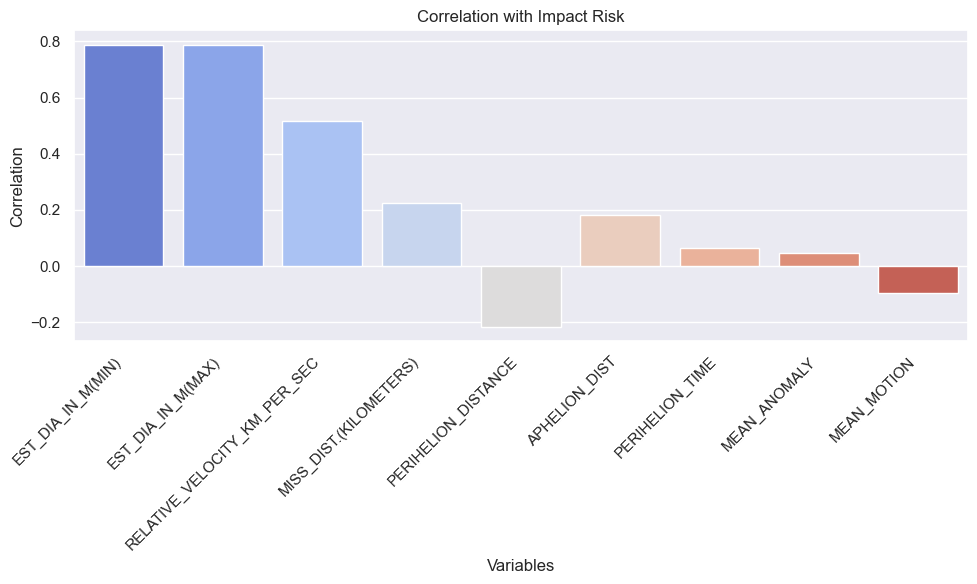

In [10]:
variables_to_compare = ['EST_DIA_IN_M(MIN)', 'EST_DIA_IN_M(MAX)', 'RELATIVE_VELOCITY_KM_PER_SEC', 'MISS_DIST.(KILOMETERS)', 'PERIHELION_DISTANCE', 'APHELION_DIST', 'PERIHELION_TIME', 'MEAN_ANOMALY', 'MEAN_MOTION']  

variables_to_compare.append('IMPACT RISK')

corr_matrix = nasa_data_EDA[variables_to_compare].corr()

impact_risk_correlation = corr_matrix['IMPACT RISK'].drop('IMPACT RISK')

#plot the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x=impact_risk_correlation.index, y=impact_risk_correlation.values, palette='coolwarm')
plt.title('Correlation with Impact Risk')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above correlation bar plot shows that `Estimated Diameter(min and max)` have a strong positive correlation with `Impact Risk`. This is followed by `Relative Velocity` which also has a fairly positive correlation with `Impact Risk` as compared to the other variables.

We will be using `Estimated Diameter(max)` in the calculation as both the min and max values have the same correlation and the max value of the diameter would provide a better range.


Therefore, we can conclude that the variables that affect `Impact Risk` the most is `Estimated Diameter(max)` and `Relative Velocity` so we will be using these 2 variables for further analysis.

### Risk of Impact

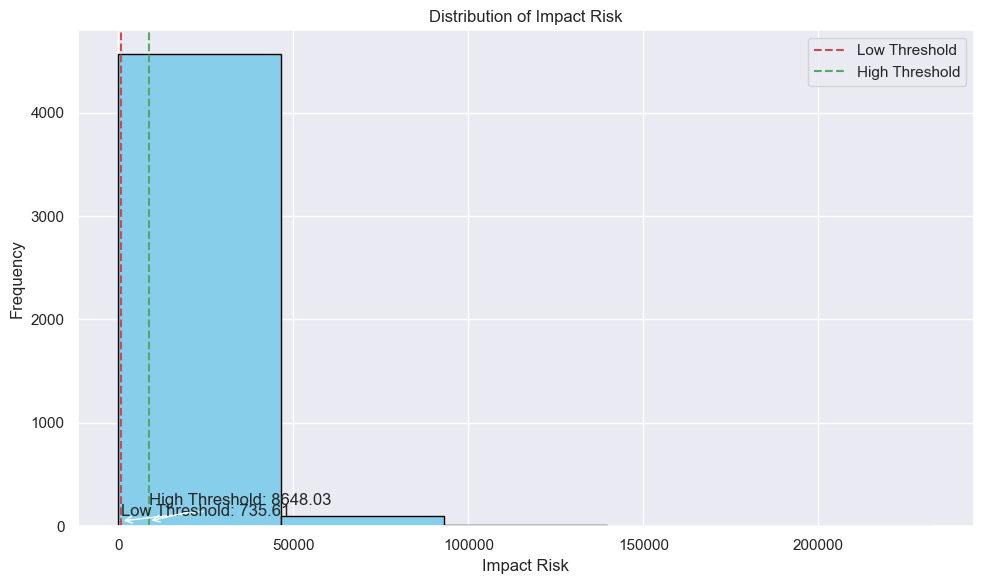

Low Threshold: 735.6060256631532
High Threshold: 8648.028995663459


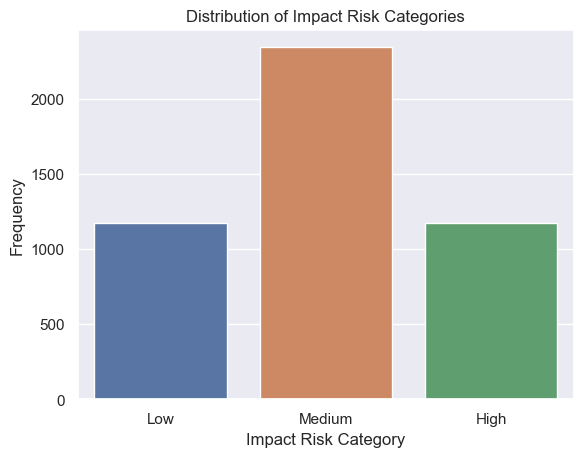

In [11]:
nasa_data['IMPACT RISK'] = (nasa_data['EST_DIA_IN_M(MAX)']) * nasa_data['RELATIVE_VELOCITY_KM_PER_SEC']

# Check the distribution of IMPACT RISK
risk_values = nasa_data['IMPACT RISK']
risk_values.describe()

# Determine thresholds based on the distribution
low_threshold = risk_values.quantile(0.25)
high_threshold = risk_values.quantile(0.75)

# Plotting the histogram with annotations for thresholds
plt.figure(figsize=(10, 6))
plt.hist(risk_values, bins=5, color='skyblue', edgecolor='black')
plt.axvline(low_threshold, color='r', linestyle='--', label='Low Threshold')
plt.axvline(high_threshold, color='g', linestyle='--', label='High Threshold')
plt.xlabel('Impact Risk')
plt.ylabel('Frequency')
plt.title('Distribution of Impact Risk')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate the thresholds on the histogram
plt.annotate(f'Low Threshold: {low_threshold:.2f}', xy=(low_threshold, 50), xytext=(low_threshold + 5, 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'High Threshold: {high_threshold:.2f}', xy=(high_threshold, 50), xytext=(high_threshold - 10, 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

print('Low Threshold:', low_threshold)
print('High Threshold:', high_threshold)

# Create a new column 'Impact Risk Category' based on calculated thresholds
nasa_data['IMPACT RISK CATEGORY'] = pd.cut(nasa_data['IMPACT RISK'], bins=[-np.inf, low_threshold, high_threshold, np.inf],labels=['Low', 'Medium', 'High'])

# Data Visualization and Analysis
# Histogram of Impact Risk Category
sb.countplot(x='IMPACT RISK CATEGORY', data=nasa_data)
plt.title('Distribution of Impact Risk Categories')
plt.xlabel('Impact Risk Category')
plt.ylabel('Frequency')
plt.show()

From the calculated impact risk categories, we will now plot violin plots for `Estimated Diameter (Max)` against `Impact Risk Category` and `Relative Velocity` against `Impact Risk Category`.

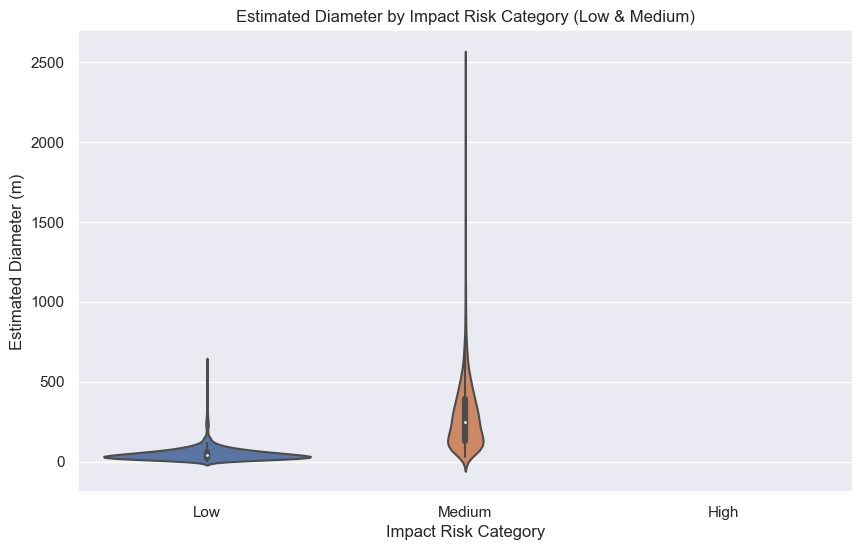

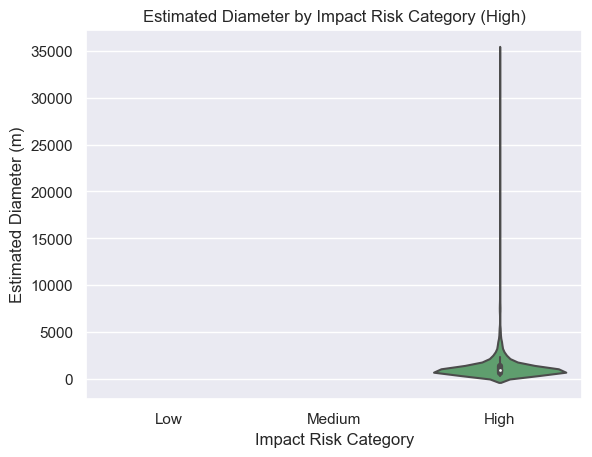

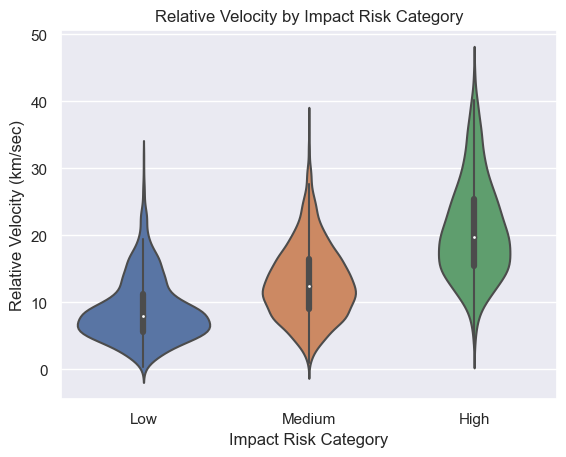

Statistical Summary of Estimated Diameter by Impact Risk Category:
                              mean      median          std
IMPACT RISK CATEGORY                                      
Low                     50.858755   39.268108    48.414826
Medium                 286.788466  247.765013   212.601799
High                  1205.454273  899.580388  1362.494749


Statistical Summary of Relative Velocity by Impact Risk Category:
                            mean     median       std
IMPACT RISK CATEGORY                                
Low                    8.914582   7.992807  4.714375
Medium                13.028534  12.401253  5.522506
High                  20.910790  19.765110  7.352925


In [12]:
# Plotting the violin plots
plt.figure(figsize=(10, 6))

# Violin plot for 'Low' and 'Medium' Impact Risk Categories together
sb.violinplot(x='IMPACT RISK CATEGORY', y='EST_DIA_IN_M(MAX)', data=nasa_data[nasa_data['IMPACT RISK CATEGORY'] != 'High'])
plt.title('Estimated Diameter by Impact Risk Category (Low & Medium)')
plt.xlabel('Impact Risk Category')
plt.ylabel('Estimated Diameter (m)')
plt.show()

# Violin plot for 'High' Impact Risk Category separately
sb.violinplot(x='IMPACT RISK CATEGORY', y='EST_DIA_IN_M(MAX)', data=nasa_data[nasa_data['IMPACT RISK CATEGORY'] == 'High'])
plt.title('Estimated Diameter by Impact Risk Category (High)')
plt.xlabel('Impact Risk Category')
plt.ylabel('Estimated Diameter (m)')
plt.show()

# Violin plot of Relative Velocity by Impact Risk Category
sb.violinplot(x='IMPACT RISK CATEGORY', y='RELATIVE_VELOCITY_KM_PER_SEC', data=nasa_data)
plt.title('Relative Velocity by Impact Risk Category')
plt.xlabel('Impact Risk Category')
plt.ylabel('Relative Velocity (km/sec)')
plt.show()

# Statistical Analysis
# Calculate mean, median, and standard deviation of Estimated Diameter by Impact Risk Category
stats_summary = nasa_data.groupby('IMPACT RISK CATEGORY')['EST_DIA_IN_M(MAX)'].agg(['mean', 'median', 'std'])
print('Statistical Summary of Estimated Diameter by Impact Risk Category:\n', stats_summary)

print("\n")

# Calculate mean, median, and standard deviation of Relative Velocity by Impact Risk Category
stats_summary = nasa_data.groupby('IMPACT RISK CATEGORY')['RELATIVE_VELOCITY_KM_PER_SEC'].agg(['mean', 'median', 'std'])
print('Statistical Summary of Relative Velocity by Impact Risk Category:\n', stats_summary)

The presence of outliers has greatly affect the scaling of graphs, particularly for the graph with `Estimated Diameter (Max)`. Outliers have distorted the above visualisation and make it challenging to interpret the overall data trends. However, removing the outliers completely is not viable as it could lead to a loss of important information. Instead, we will plot again with a strip plot to visualise better.

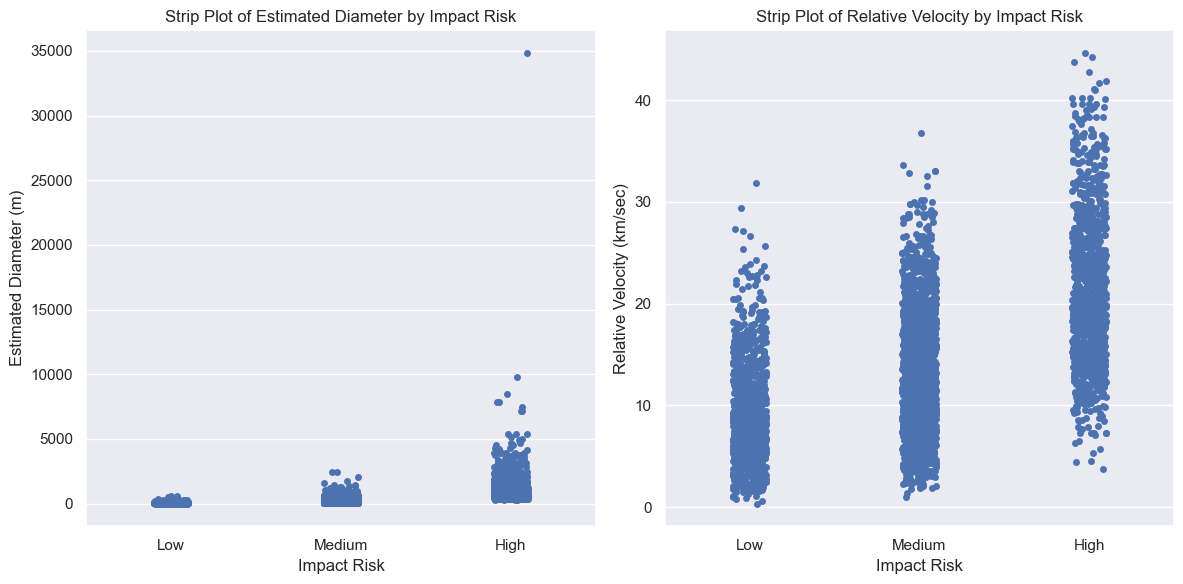

In [13]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Strip plot for Estimated Diameter by Impact Risk
plt.subplot(1, 2, 1)
sb.stripplot(x='IMPACT RISK CATEGORY', y='EST_DIA_IN_M(MAX)', data=nasa_data)
plt.title('Strip Plot of Estimated Diameter by Impact Risk')
plt.xlabel('Impact Risk')
plt.ylabel('Estimated Diameter (m)')

# Strip plot for Relative Velocity by Impact Risk
plt.subplot(1, 2, 2)
sb.stripplot(x='IMPACT RISK CATEGORY', y='RELATIVE_VELOCITY_KM_PER_SEC', data=nasa_data)
plt.title('Strip Plot of Relative Velocity by Impact Risk')
plt.xlabel('Impact Risk')
plt.ylabel('Relative Velocity (km/sec)')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

From the strip plot above, we can see how `Estimated Diameter(Max)` clusters at higher values as the `Impact Risk` increases. There is also one sole outlier at the highest `Estimated Diameter(Max)` of almost 35000m in the high category. 
We will remove this particular outlier just for the sake of seeing the distribution between the `Estimated Diameter(Max)` with different `Impact Risk`.

Moreover, `Relative Velocity` also clusters at higher values as the `Impact Risk` increases. The range of distribution of values is also larger as `Impact Risk` goes from low to high.

In [14]:
# Removing one outlier from Estimated Diameter (max)
outlier_condition = (nasa_data['EST_DIA_IN_M(MAX)'] < 15000)  # Define 'upper_threshold_value' accordingly

# Create a new DataFrame without the outlier
cleaned_data = nasa_data[outlier_condition]

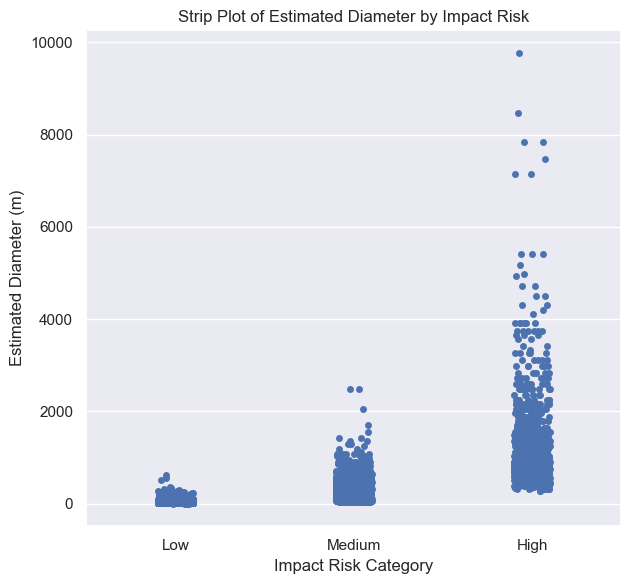

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Strip plot for Estimated Diameter by Impact Risk
plt.subplot(1, 2, 1)
sb.stripplot(x='IMPACT RISK CATEGORY', y='EST_DIA_IN_M(MAX)', data=cleaned_data)
plt.title('Strip Plot of Estimated Diameter by Impact Risk')
plt.xlabel('Impact Risk Category')
plt.ylabel('Estimated Diameter (m)')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

From the above strip plot, we still see that the `Estimated Diameter(Max)` values still cluster at higher values as the `Impact Risk` increases. It seems that the values in low category are the most clustered while the values in high category are more spread out.

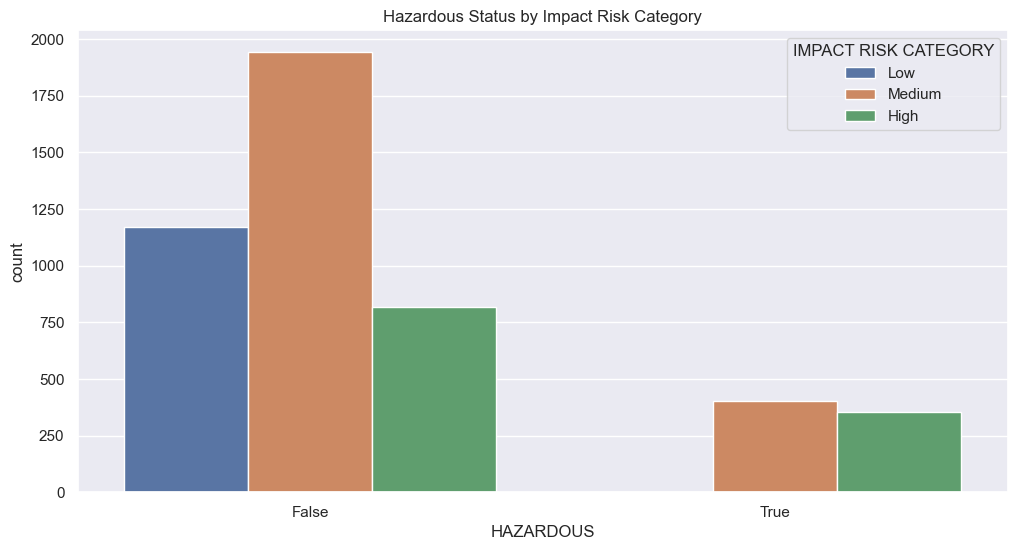

In [16]:
plt.figure(figsize=(12, 6))
sb.countplot(x='HAZARDOUS', hue='IMPACT RISK CATEGORY', data=nasa_data)
plt.title('Hazardous Status by Impact Risk Category')
plt.show()

From the above categorical plot, we can see how the `HAZARDOUS` near-Earth Objects (NEOs) are mainly in the medium and high impact risk category. Yet, there are still non-hazardous NEOs that are in all three categories, so we will now consider hazardous as one of the predictor variables to the `IMPACT RISK CATEGORY`.

In [17]:
# Basic statistics of categories
print(nasa_data['HAZARDOUS'].value_counts())
print(nasa_data['IMPACT RISK CATEGORY'].value_counts())

# Cross-tabulation of the two variables
cross_tab = pd.crosstab(nasa_data['HAZARDOUS'], nasa_data['IMPACT RISK CATEGORY'])
print(cross_tab)

False    3932
True      755
Name: HAZARDOUS, dtype: int64
Medium    2343
Low       1172
High      1172
Name: IMPACT RISK CATEGORY, dtype: int64
IMPACT RISK CATEGORY   Low  Medium  High
HAZARDOUS                               
False                 1172    1941   819
True                     0     402   353


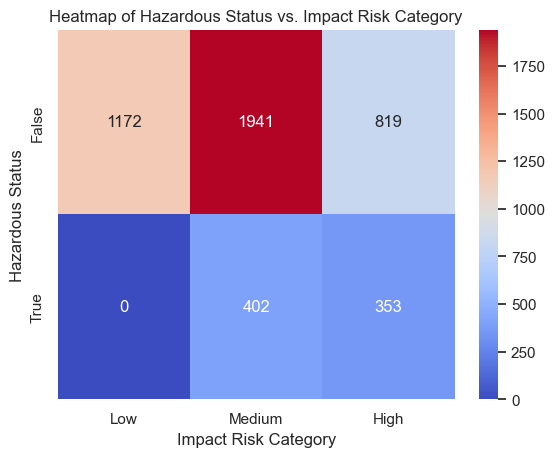

In [18]:
sb.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Hazardous Status vs. Impact Risk Category')
plt.xlabel('Impact Risk Category')
plt.ylabel('Hazardous Status')
plt.show()

From the above heatmap, all NEOs deemed `Low Risk` are not considered `HAZARDOUS`, while the `Medium` and `High Impact Risk Categories` contain both `HAZARDOUS` and `NON-HAZARDOUS` NEOs, with `NON-HAZARDOUS` NEOs being predominant in the `Medium` category. Thus, this variable might be predictive of at least a `Medium Risk` classification.